In [173]:
import librosa as liro
import numpy as np
import soundfile as sf
from scipy.io import wavfile
import matplotlib.pyplot as plt


In [ ]:
## 데이터 가져올 때 re-sample을 원하는 경우.

def open_wav_with_resample(file_name, bit, origin_rate, new_rate):
    data, rate = sf.read(file_name, dtype=bit)
    data = data.T
    data = liro.resample(data, origin_rate, new_rate)
    return data, new_rate

In [100]:
print(samplerate,  data.shape)
print(data)

22050 (1323000,)
[    0     0     0 ... -7205 -6493 -6674]


In [57]:
len(data) // samplerate

60

In [80]:
22050 * 6

132300

In [92]:
1323000 / 6

220500.0

In [111]:
220500.0 * 6

1323000.0

In [165]:
try:    
    samplerate, data = wavfile.read('./wav/샘플_2.wav')
    second_time = len(data) // samplerate
except Exception as e:
    print(e)
    print('안됨')
    
second_time

30

In [160]:
try:    
    samplerate, data = wavfile.read('./wav/StarWars60.wav')
    second_time = len(data) // samplerate
except Exception as e:
    print(e)
    print('안됨')
    
second_time

60

In [161]:
len(data) // samplerate

60

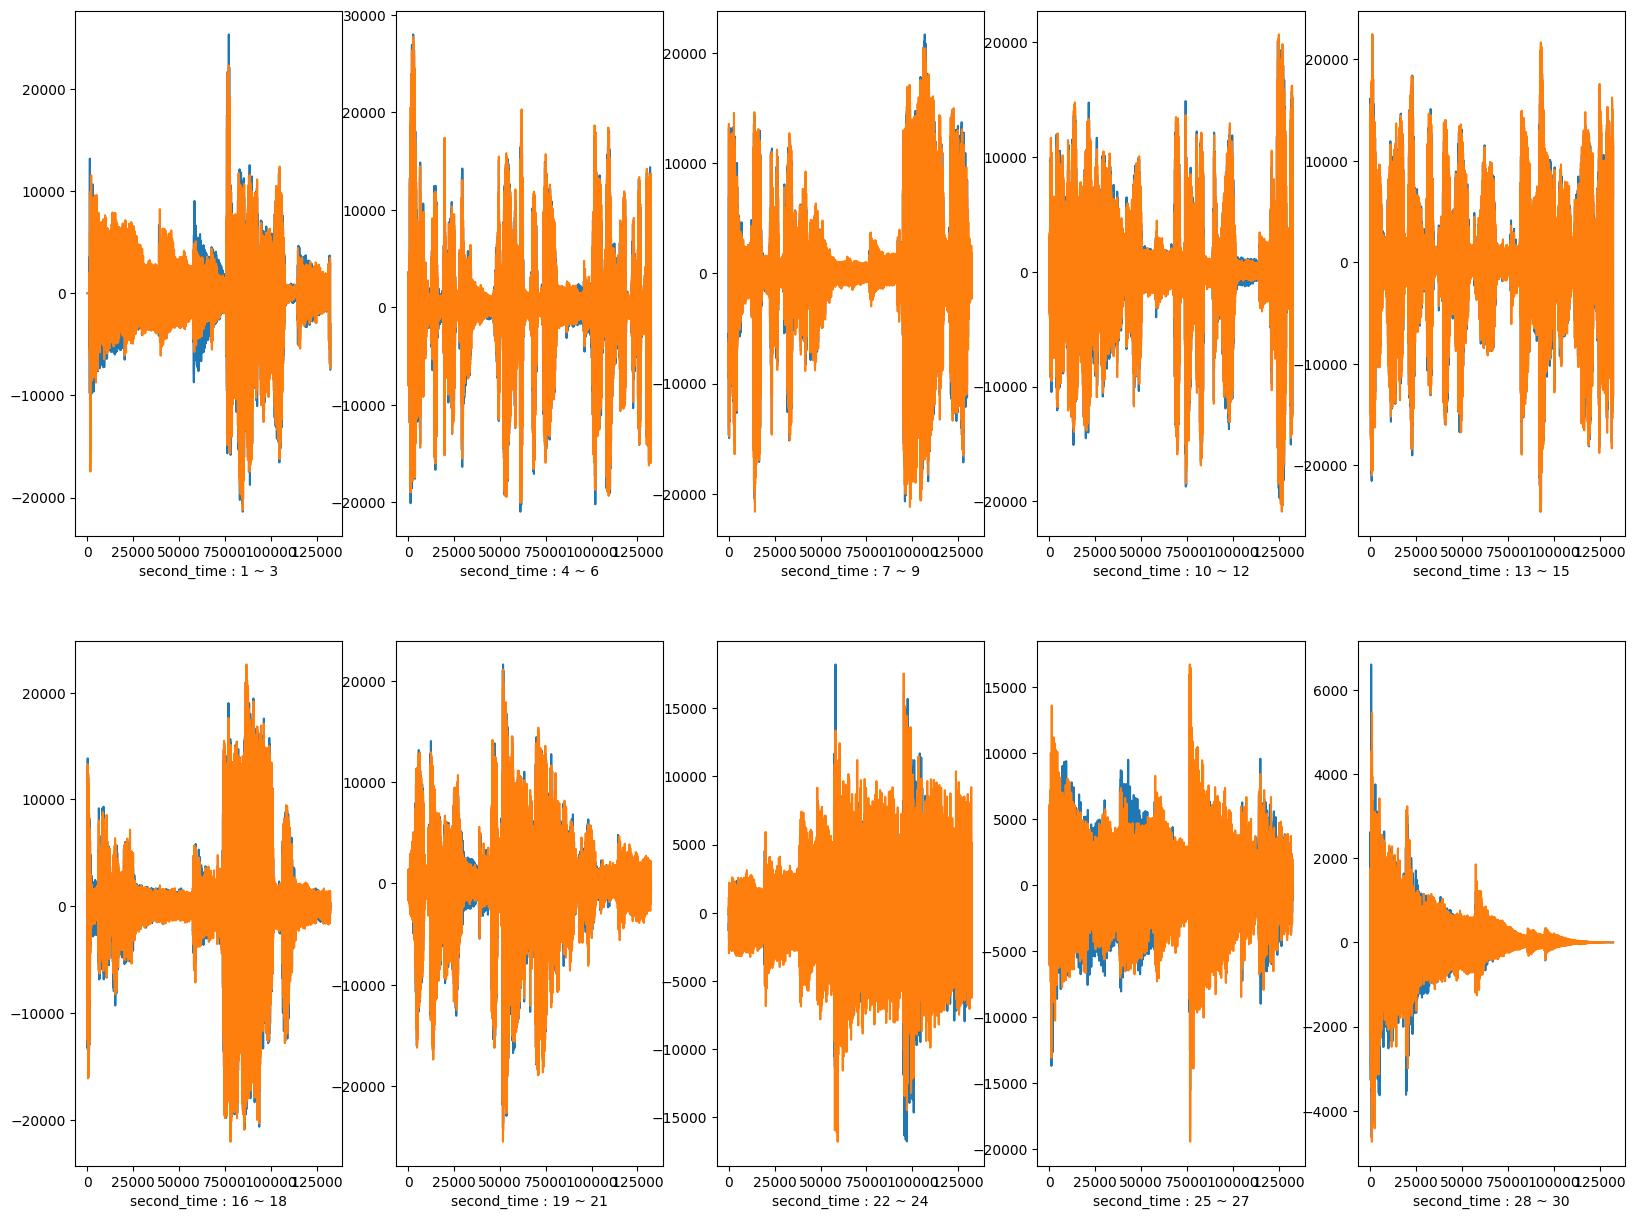

In [166]:


def wav_gr(samplerate , data, spl , shapes = (2,3)):
    plt.figure(figsize = (20,15))
    count = 0
    jump = len(data) // spl
    
    times = (len(data) // samplerate) // spl
    zero_timess = 0
    
    for i in range(0 ,len(data) , jump):
        plt.subplot(shapes[0] , shapes[1] , count + 1)
        count += 1
        
        plt.plot(data[i:jump + i])
        plt.xlabel('second_time : ' + str(0 + zero_timess + 1) + ' ~ ' + str((zero_timess + times)))
        zero_timess += times
        if len(data) - i < jump * 2:
            break
        
wav_gr(samplerate = samplerate , data = data , spl = 10 , shapes=(2,5))
# wav_gr(samplerate = samplerate , data = data , spl = 6)
# wav_gr(samplerate = samplerate , data = data , spl = 10 , shapes=(2,5))

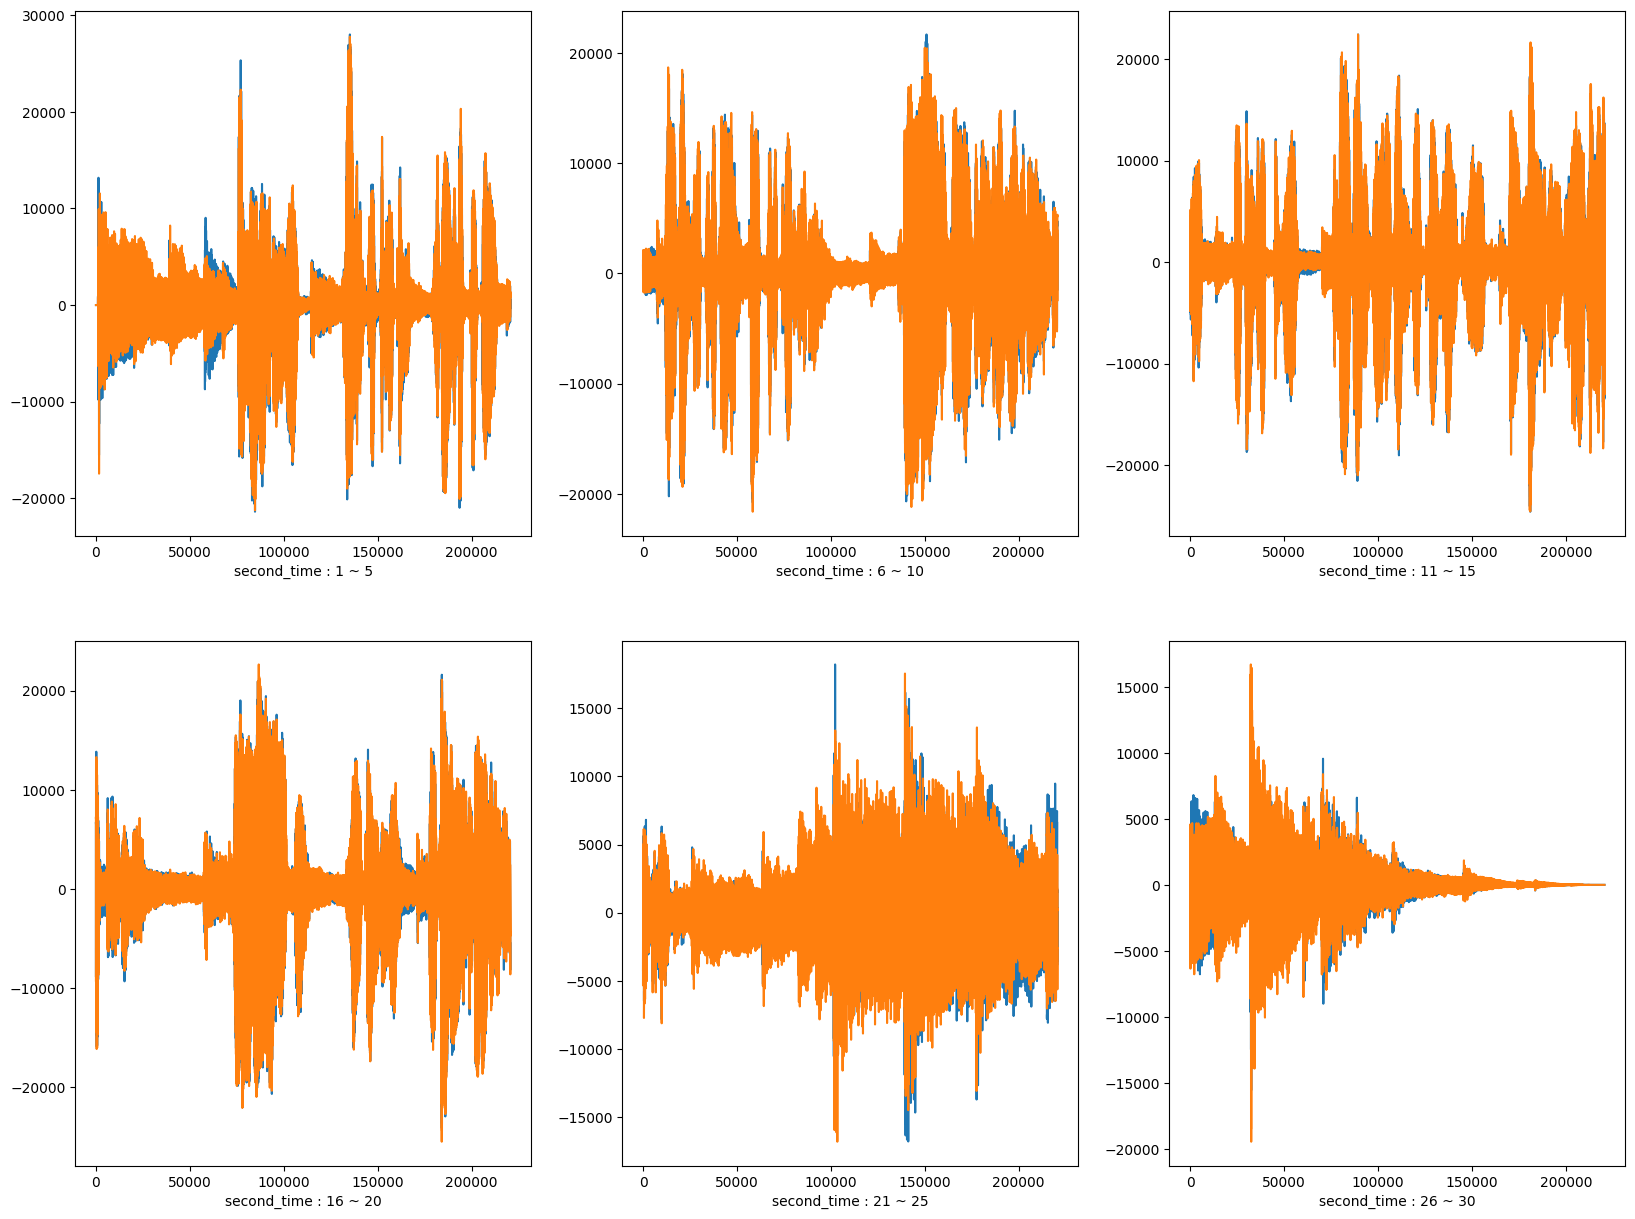

In [168]:
wav_gr(samplerate = samplerate , data = data , spl = 6 , shapes=(2,3))

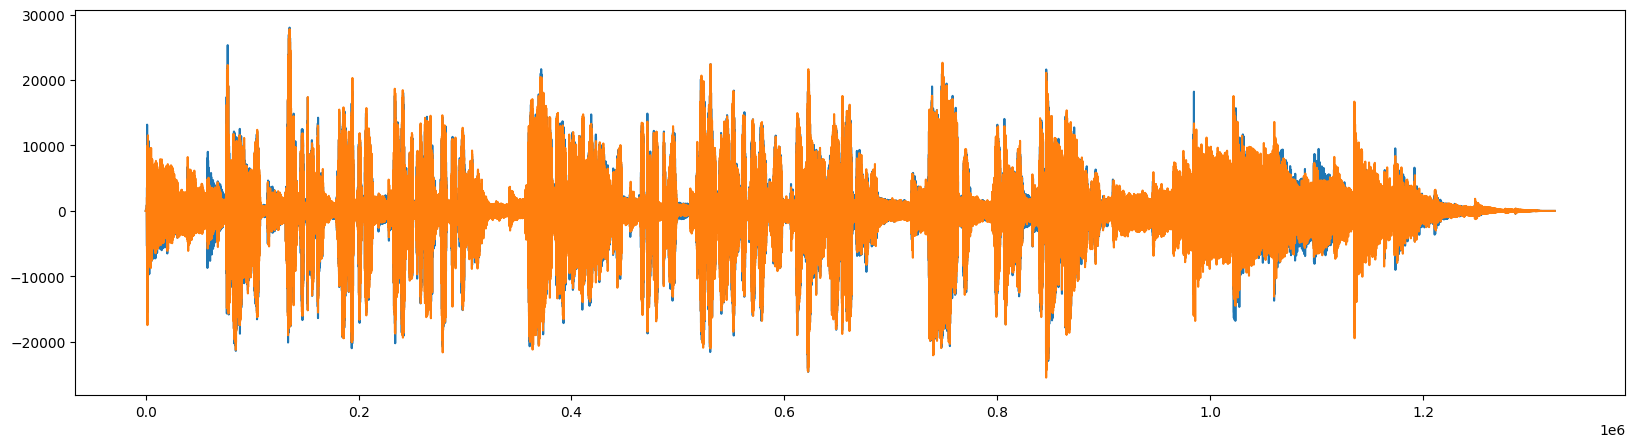

In [167]:
plt.figure(figsize = (20 , 5))
plt.plot(data)

In [164]:
data.min() , data.max()

(-32394, 29278)

In [ ]:


def wav_gr(samplerate , data, spl , shapes = (2,3)):
    plt.figure(figsize = (20,15))
    count = 0
    jump = len(data) // spl
    
    times = (len(data) // samplerate) // spl
    zero_timess = 0
    
    for i in range(0 ,len(data) , jump):
        plt.subplot(shapes[0] , shapes[1] , count + 1)
        count += 1
        
        plt.plot(data[i:jump + i])
        plt.xlabel('second_time : ' + str(0 + zero_timess + 1) + ' ~ ' + str((zero_timess + times)))
        zero_timess += times
        if len(data) - i < jump * 2:
            break

        

In [169]:
try:    
    samplerate, data = wavfile.read('./wav/샘플_2.wav')
    second_time = len(data) // samplerate
except Exception as e:
    print(e)
    print('안됨')
    
second_time

30

In [201]:
def wav_spl(samplerate , data):
    
    main_list = list()
    samplerate
    stor = 0

    for i in range(0 , len(data) , samplerate):

        main_list.append(data[i : i + samplerate])
        if len(data) - i < samplerate * 2:
            break

    

    main_list = np.array(main_list)


        
    return main_list

jj = wav_spl(samplerate=samplerate , data = data)

13180 -17451
25333 -21389
12539 -18765
28012 -20113
20317 -20983
18673 -20225
14618 -21623
6329 -8803
21661 -21192
14762 -15091
14873 -18717
20680 -20907
22443 -21565
14924 -18984
21657 -24602
14439 -16127
22646 -22064
19454 -20656
14058 -17372
21610 -25474
6818 -8600
7423 -6885
18224 -16814
17556 -16797
13599 -13717
16702 -19463
9559 -9007
6606 -4738
1855 -1256
335 -428


In [202]:
jj.shape

(30, 44100, 2)

In [213]:
pip install PyAudio

     ------------------------------------- 164.0/164.0 kB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import speech_recognition as sr
import scipy.io.wavfile


# 함수 정의부
def get_speech():
    # 마이크에서 음성을 추출하는 객체
    recognizer = sr.Recognizer()  #실제로 듣는 역할.

    # 마이크 설정
    microphone = sr.Microphone(sample_rate=16000)  ## 마이크를 가져오는것.  즉 마이크.

    # 마이크 소음 수치 반영
    with microphone as source:
        recognizer.adjust_for_ambient_noise(source)
        print("소음 수치 반영하여 음성을 청취합니다. {}".format(recognizer.energy_threshold))

    # 음성 수집
    with microphone as source:
        print("목소리를 들을 준비가 되었습니다. 말씀해주세요 :)")
        result = recognizer.listen(source)
        print('-' * 100)
        audio = result.get_raw_data()
    
    # print('-' * 100)

    return audio


for i in range(3):
    jk = get_speech()    
    print(type(jk))

소음 수치 반영하여 음성을 청취합니다. 48.54772278790719
목소리를 들을 준비가 되었습니다. 말씀해주세요 :)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<class 'bytes'>
소음 수치 반영하여 음성을 청취합니다. 48.54772278790719
목소리를 들을 준비가 되었습니다. 말씀해주세요 :)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<class 'bytes'>
소음 수치 반영하여 음성을 청취합니다. 69.49164667561018
목소리를 들을 준비가 되었습니다. 말씀해주세요 :)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<class 'bytes'>


In [218]:
type(jk)

bytes